#LABWORK 1 : HOUSE PRICING PREDICTION USING REGRESSION

## 0 Import libraries

In [135]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sns.set(style="whitegrid")

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

## 1 Data Analysis






### 1.1 Dataset Overview

In [136]:
# Read csv file
df = pd.read_csv('/content/House Pricing.csv')

# Overview of the dataset (first 5 rows of the dataset)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [137]:
# List out all the columns
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [138]:
# Shape of dataset
df.shape

(545, 13)

In [139]:
# Info of dataset
# Check for NaN/missing values
# Check for count and data types for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [140]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [141]:
# List out all the variety of values in each column
for col in df.columns:
    print("Unique values in column '{}' are:".format(col))
    print(df[col].unique())

Unique values in column 'price' are:
[13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  495

### 1.2 Attribute information

In [142]:
# Extract attributes information
col_list = df.columns.values.tolist()

for col_name in col_list:
    print(df.groupby(col_name).size())
    print("\n")

price
1750000     3
1767150     1
1820000     1
1855000     1
1890000     2
           ..
10850000    1
11410000    1
12215000    1
12250000    2
13300000    1
Length: 219, dtype: int64


area
1650     1
1700     1
1836     1
1905     1
1950     2
        ..
12900    1
12944    1
13200    2
15600    1
16200    1
Length: 284, dtype: int64


bedrooms
1      2
2    136
3    300
4     95
5     10
6      2
dtype: int64


bathrooms
1    401
2    133
3     10
4      1
dtype: int64


stories
1    227
2    238
3     39
4     41
dtype: int64


mainroad
no      77
yes    468
dtype: int64


guestroom
no     448
yes     97
dtype: int64


basement
no     354
yes    191
dtype: int64


hotwaterheating
no     520
yes     25
dtype: int64


airconditioning
no     373
yes    172
dtype: int64


parking
0    299
1    126
2    108
3     12
dtype: int64


prefarea
no     417
yes    128
dtype: int64


furnishingstatus
furnished         140
semi-furnished    227
unfurnished       178
dtype: int64




### 1.3 Visualization

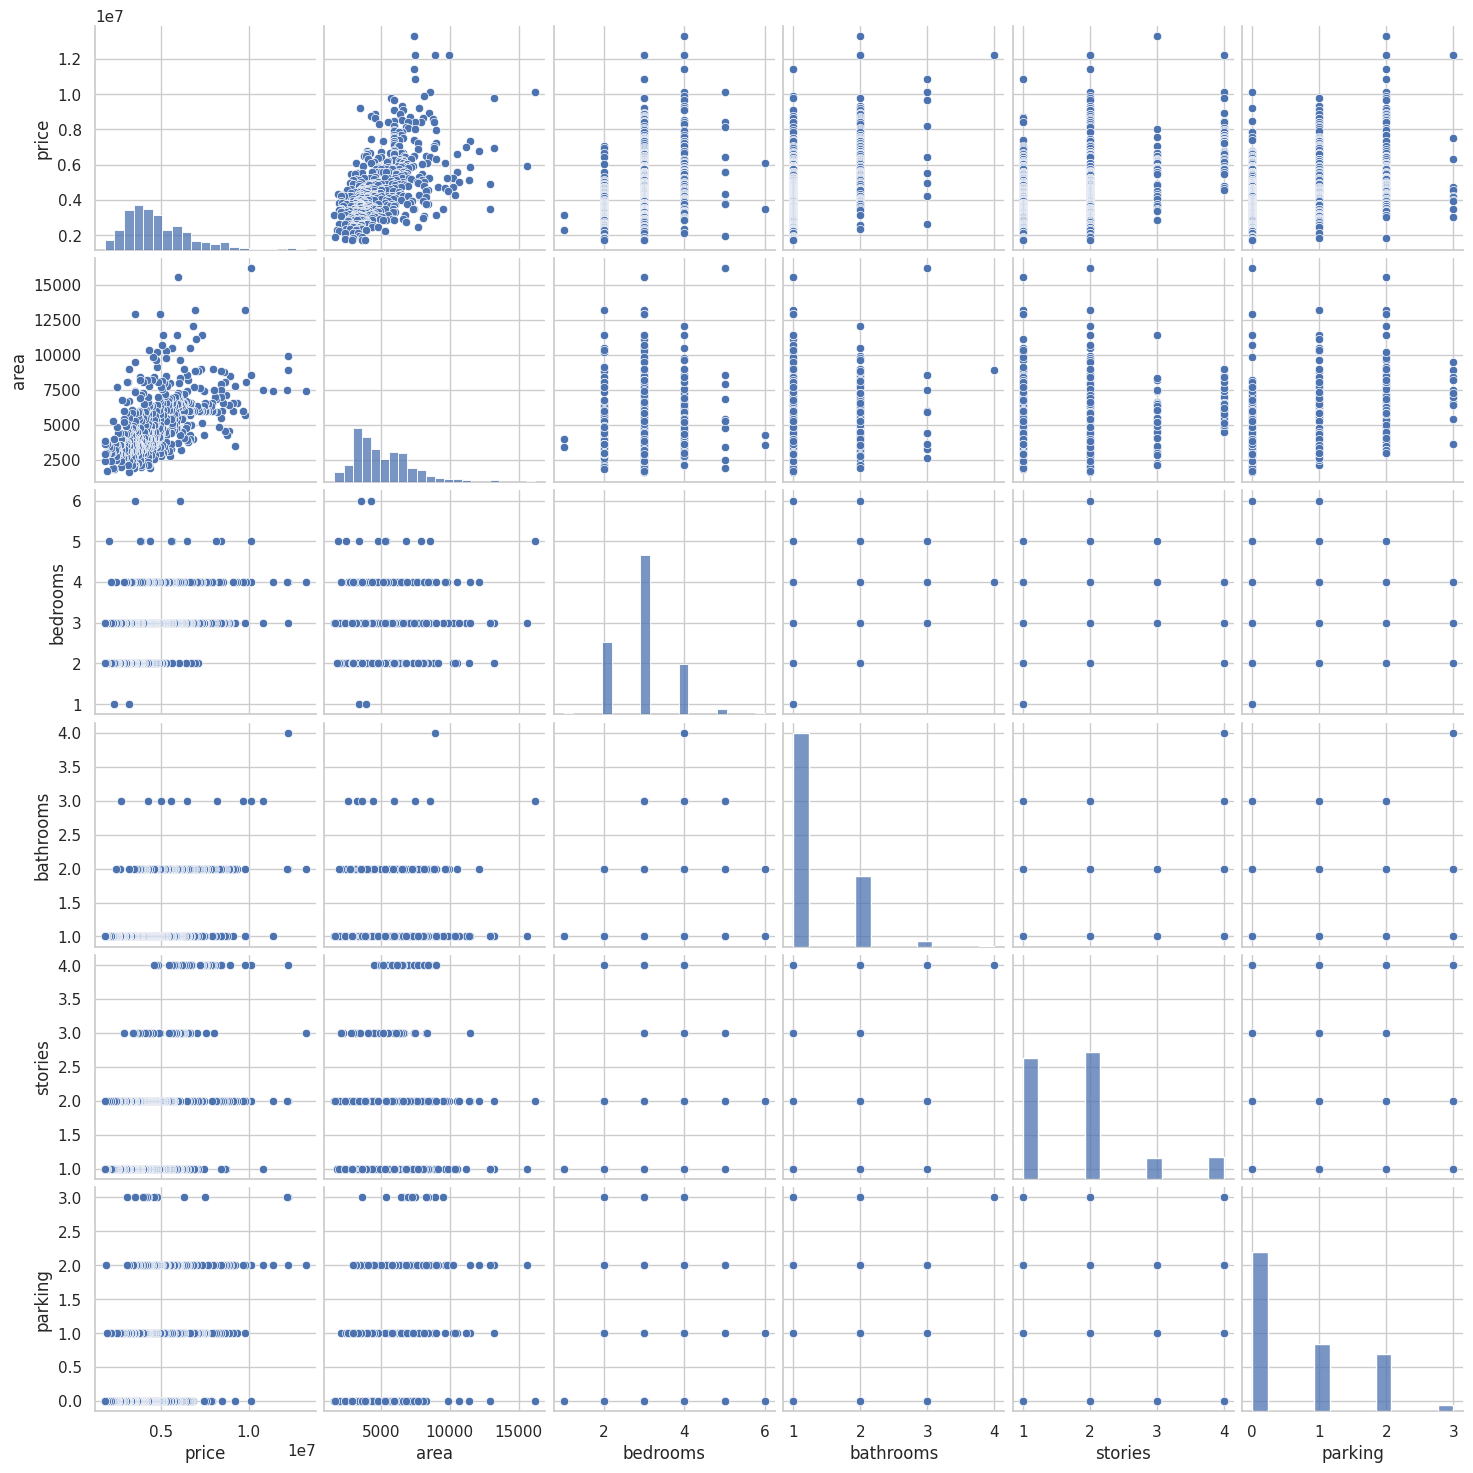

In [143]:
# Visualize the numerical variables
sns.pairplot(df)
plt.show()

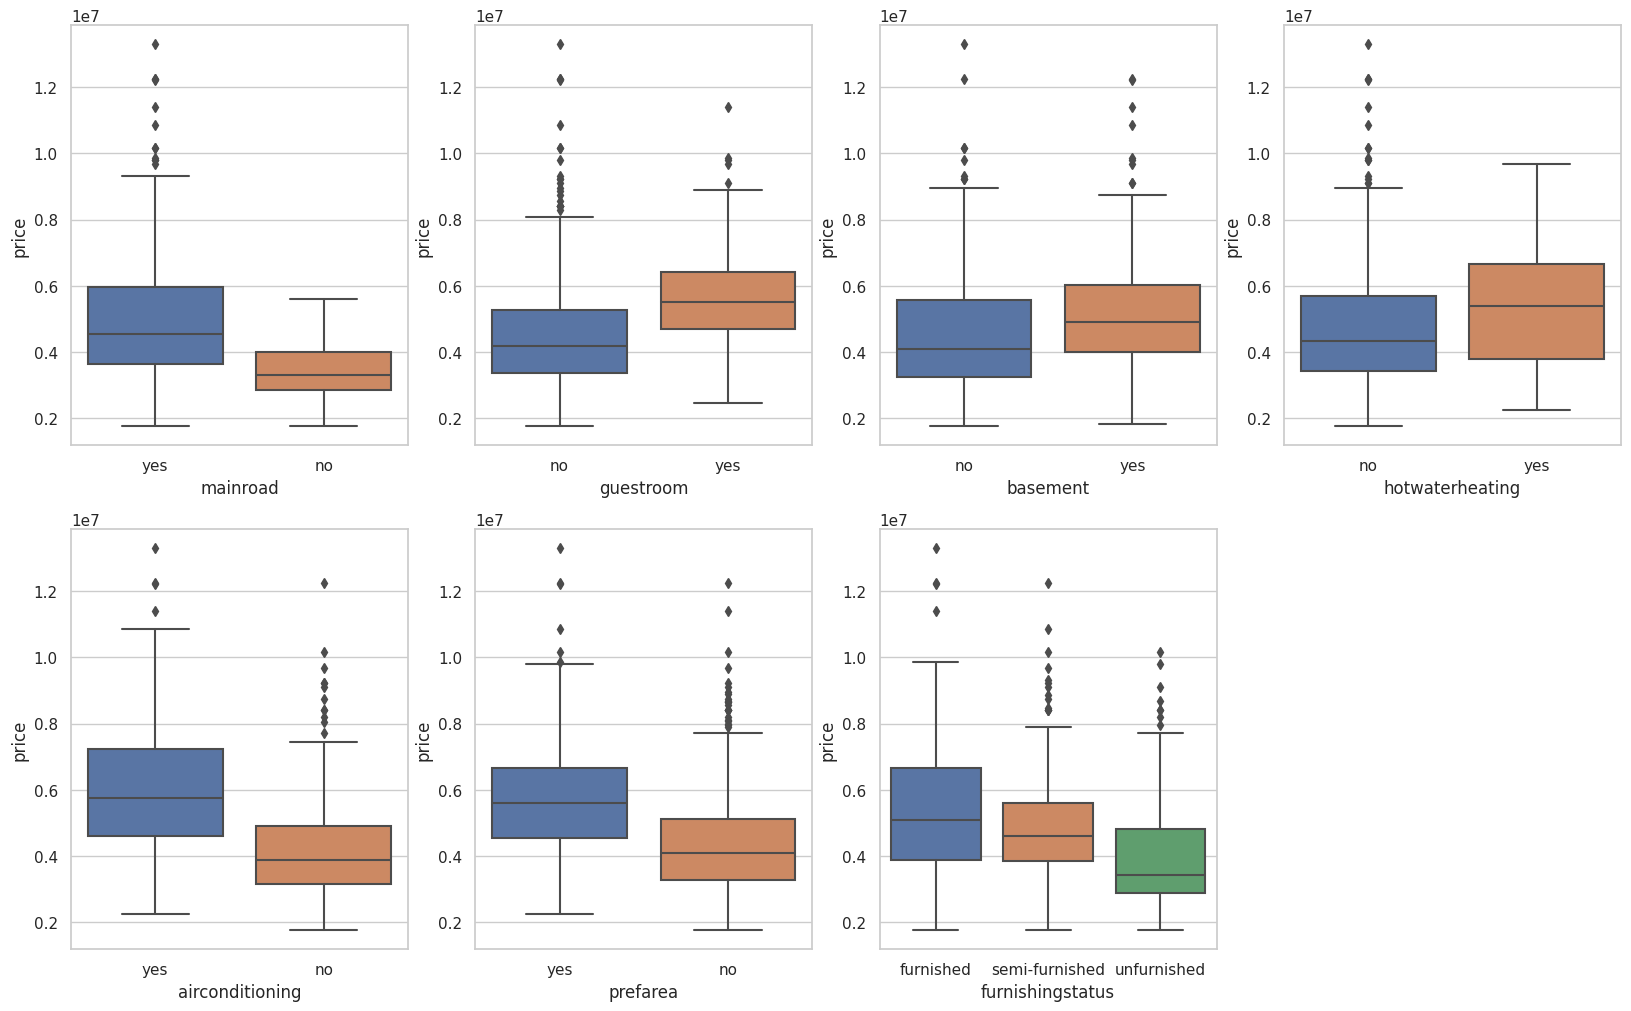

In [144]:
# Box plot
# Visualize the distribution of categorical features ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x='mainroad', y='price', data=df)
plt.subplot(2,4,2)
sns.boxplot(x='guestroom', y='price', data=df)
plt.subplot(2,4,3)
sns.boxplot(x='basement', y='price', data=df)
plt.subplot(2,4,4)
sns.boxplot(x='hotwaterheating', y='price', data=df)
plt.subplot(2,4,5)
sns.boxplot(x='airconditioning', y='price', data=df)
plt.subplot(2,4,6)
sns.boxplot(x='prefarea', y='price', data=df)
plt.subplot(2,4,7)
sns.boxplot(x='furnishingstatus', y='price', data=df)
plt.show()

### 1.4 Outlier Analysis

['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']


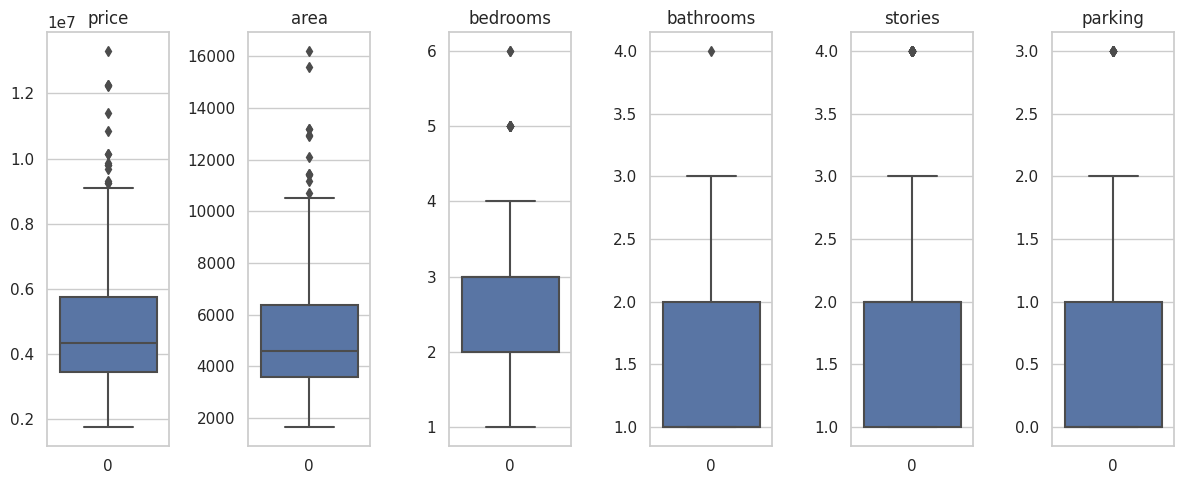

In [145]:
# Boxplot
# List all the columns with numerical values
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
print(numeric_cols)

# create boxplot for each numerical columns ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
fig, axes = plt.subplots(nrows=1, ncols=len(numeric_cols), figsize=(12, 5))

# i for index, col for column name
for i, col in enumerate(numeric_cols): 
    sns.boxplot(df[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

In [146]:
# Check the skewness for each columns (data is normal if the skewness is between -2 to 2)
for col in numeric_cols:
    skewness = df[col].skew()
    print("Skewness of {}: {}".format(col, skewness))

Skewness of price: 1.2122388370279802
Skewness of area: 1.321188343153483
Skewness of bedrooms: 0.49568394074553473
Skewness of bathrooms: 1.5892635781317528
Skewness of stories: 1.0820882904085742
Skewness of parking: 0.8420623343734072


### 1.5 Convert Non-numerical values to numerical values

In [147]:
df['mainroad'] = df['mainroad'].map({'yes': 1, 'no': 0})
df['guestroom'] = df['guestroom'].map({'yes': 1, 'no': 0})
df['basement'] = df['basement'].map({'yes': 1, 'no': 0})
df['hotwaterheating'] = df['hotwaterheating'].map({'yes': 1, 'no': 0})
df['airconditioning'] = df['airconditioning'].map({'yes': 1, 'no': 0})
df['prefarea'] = df['prefarea'].map({'yes': 1, 'no': 0})
df['furnishingstatus'] = df['furnishingstatus'].map({'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2})

df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,2
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,2
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,2
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,2


## 2 Data Preprocessing 

### 2.1 Handling Missing Values

In [148]:
# Check NaN values in file
num_nan_rows = df.isnull().sum(axis=1).astype(bool).sum()
total_rows = df.shape[0]
print('Number of records in total: {}\nNumber of records that has NaN values: {}'.format(total_rows, num_nan_rows))

# Remove NaN values
df = df.dropna()
print('Number of records after removing NaN values: {}'.format(df.shape[0]))

Number of records in total: 545
Number of records that has NaN values: 0
Number of records after removing NaN values: 545


In [149]:
# Check for null value
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

### 2.2 Correlation Matrix Analysis
The 3 features that are highly correlated to label 'price'
1.   area with 0.54
2.   bathrooms with 0.52
3.   airconditioning with 0.45



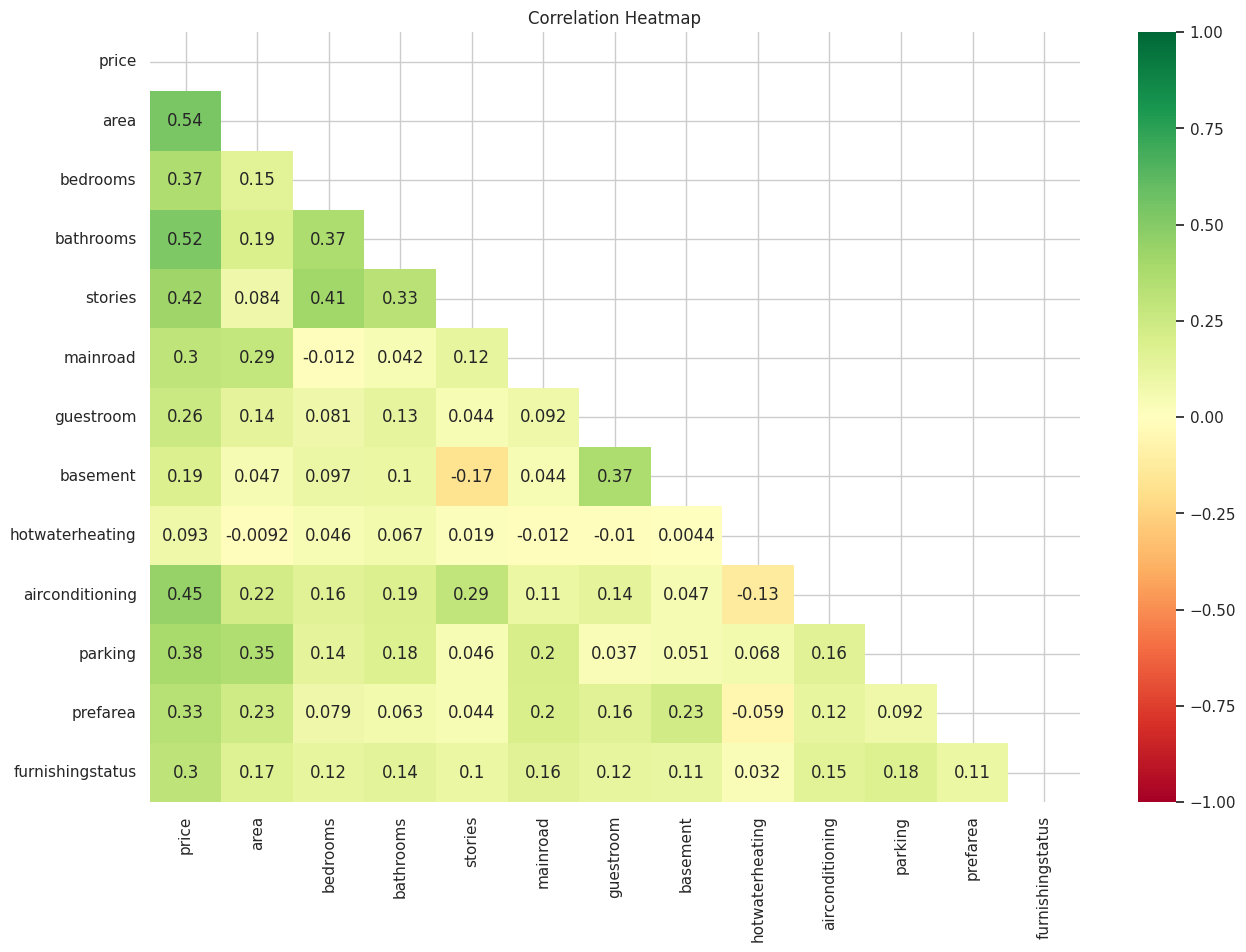

In [150]:
# Correlation matrix used to find the correlation between the features and the target variable
# Check the correlation coefficients to see which variables are highly correlated

fig, ax = plt.subplots(figsize=(15, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))  # Create a mask for the upper triangular portion
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='RdYlGn', annot=True, mask=mask, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

### 2.3 Normalize the dataset to range [0,1]

In [151]:
df['id'] = [i for i in range(len(df))]
id = df.pop('id')
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized = pd.concat([df_normalized, id.reset_index(drop=True)], axis=1)

# df_normalized.head()
last_col = df_normalized.pop(df_normalized.columns[-1])
df_normalized.insert(0, last_col.name, last_col)
df_normalized.head(20)

,id,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,1.0
1,1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,1.0
2,2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,0.5
3,3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,1.0
4,4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,1.0
5,5,0.787879,0.402062,0.4,0.666667,0.000000,1.0,0.0,1.0,0.0,1.0,0.666667,1.0,0.5
6,6,0.727273,0.476289,0.6,0.666667,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.5
7,7,0.727273,1.000000,0.8,0.666667,0.333333,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8,8,0.703030,0.443299,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,1.0,1.0
9,9,0.696970,0.281787,0.4,0.333333,1.000000,1.0,1.0,0.0,0.0,1.0,0.333333,1.0,0.0


### 2.4 Split the dataset into training and testing sets

In [152]:
from sklearn.model_selection import train_test_split

# Splitting the dataset to testing dataset and training dataset in 0.2 : 0.8 ratio
X_train, X_test, y_train, y_test = train_test_split(df_normalized.drop("price", axis=1), df["price"], test_size=0.2, random_state=42)

## 3 Regression Model Developement

### 3.1 Implement Ridge regression into the training model

In [153]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

# Defines hyperparameters
lambda_values = [0.0001, 0.001, 0.01, 0.1, 1, 10]
l1_ratios = [0, 0.5, 1]

ridge_models = []
colors = ['r', 'c', 'y']
    
# Generate models with different hyperparameters
for i, alpha in enumerate(lambda_values):
  for j, l1_ratio in enumerate(l1_ratios):
    color = colors[(i * len(l1_ratios) + j) % len(colors)]
    ridge = Ridge( alpha= alpha, solver='auto', max_iter=1000, tol=0.001, random_state=42)
    ridge.fit(df_normalized.drop("price", axis=1),df["price"])
    ridge_models.append({'alpha': alpha, 'l1_ratio': l1_ratio, 'model': ridge, 'color': color})

## 4 Model Evaluation

### 4.1 Analyse performance of regression models using evaluation metrics

In [154]:
# Evaluate each model on test data
import matplotlib.pyplot as plt

results = []
best_model_info = None
highest_accuracy = 0

for model_info in ridge_models:
    model = model_info['model']
    y_pred_ridge = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred_ridge, squared=False)
    r2 = r2_score(y_test, y_pred_ridge)
    mae = np.mean(np.abs(y_pred_ridge - y_test))
    error_percentage = ((mae / y_test.mean())*100)
    model_info['rmse'] = rmse
    model_info['r2'] = r2
    model_info['mae'] = mae
    model_info['error_percentage'] = error_percentage
    accuracy = model_info['r2']

    # Update the best model if model has higher accuracy
    if accuracy > highest_accuracy:
      highest_accuracy = accuracy
      best_model_info = model_info

# Results of performance
import matplotlib.pyplot as plt
for model_info in ridge_models:
    model = model_info['model']
    y_pred_ridge = model.predict(X_test)
    print('Lambda value : ', model_info['alpha'])
    print('L1 Ratio : ', model_info['l1_ratio'])
    print('RMSE : ', model_info['rmse'])
    print('Accuracy : ', model_info['r2'])
    print('MAE : ', model_info['mae'])
    print('Error Percentage : ', model_info['error_percentage'])
    print('\n')

Lambda value :  0.0001
L1 Ratio :  0
RMSE :  851332.4963609684
Accuracy :  0.8566115447931166
MAE :  503355.52834231185
Error Percentage :  10.051958852722363


Lambda value :  0.0001
L1 Ratio :  0.5
RMSE :  851332.4963609684
Accuracy :  0.8566115447931166
MAE :  503355.52834231185
Error Percentage :  10.051958852722363


Lambda value :  0.0001
L1 Ratio :  1
RMSE :  851332.4963609684
Accuracy :  0.8566115447931166
MAE :  503355.52834231185
Error Percentage :  10.051958852722363


Lambda value :  0.001
L1 Ratio :  0
RMSE :  851333.7982304882
Accuracy :  0.8566111062495326
MAE :  503356.01804340584
Error Percentage :  10.051968632003547


Lambda value :  0.001
L1 Ratio :  0.5
RMSE :  851333.7982304882
Accuracy :  0.8566111062495326
MAE :  503356.01804340584
Error Percentage :  10.051968632003547


Lambda value :  0.001
L1 Ratio :  1
RMSE :  851333.7982304882
Accuracy :  0.8566111062495326
MAE :  503356.01804340584
Error Percentage :  10.051968632003547


Lambda value :  0.01
L1 Ratio :  

### 4.2 Visualization

Best model with alpha = 0.0001:



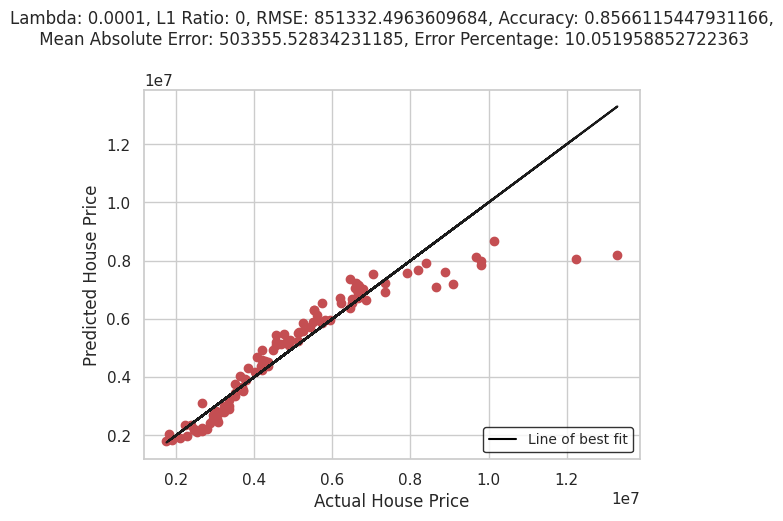

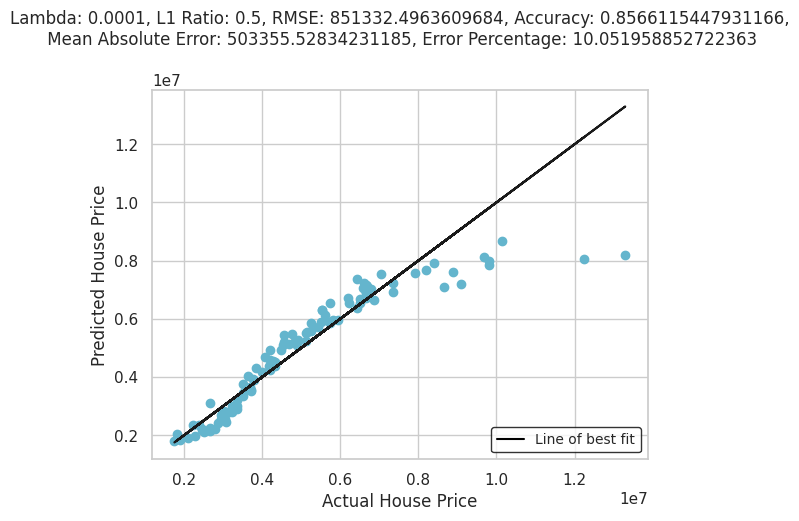

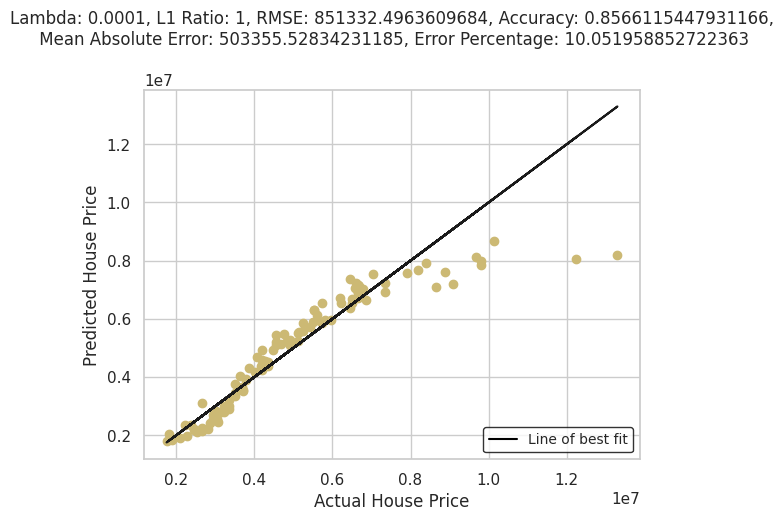

In [155]:
# Visualize the model with best hyperparameters
if best_model_info is not None:
    print(f"Best model with alpha = {best_model_info['alpha']}:\n")
    for model_info in ridge_models:
        if model_info['alpha'] == best_model_info['alpha']:
            model = model_info['model']
            y_pred_ridge = model.predict(X_test)
            plt.scatter(y_test, y_pred_ridge, color=model_info['color'])
            plt.xlabel('Actual House Price')
            plt.ylabel('Predicted House Price')
            plt.title(f"Lambda: {model_info['alpha']}, L1 Ratio: {model_info['l1_ratio']}, RMSE: {model_info['rmse']}, Accuracy: {model_info['r2']},\n Mean Absolute Error: {model_info['mae']}, Error Percentage: {model_info['error_percentage']}\n")
            plt.plot(y_test, y_test, 'k-')

            line_properties = {'color': 'black', 'label': 'Line'}
            legend_properties = {'edgecolor': 'black', 'bbox_to_anchor': (1, 0), 'loc': 'lower right'}
            plt.legend(handles=[plt.Line2D([0], [0], **line_properties)], labels=['Line of best fit'], prop={'size': 10}, **legend_properties)
            plt.show()
            print("\n")

## Conclusion

By having lamda, the regularization strength of model of 0.0001 and L1 ratio, the ratio for regularization term balancing between Lasso and Ridge with range of [0,0.5,1], Ridge regression model performs the best in predicting the housing price after having fine-tuning of the model's hyperparameters.